In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

# defining dataframe

In [2]:
df=pd.read_csv("abalonproject.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


there is 4177 rows and 9 columns , terget columns is Rings

# Checking Null value

In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

no null value present

In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

only sex column datatype is object other is float

In [5]:
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder

# data types chnaging

In [6]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# eda processing

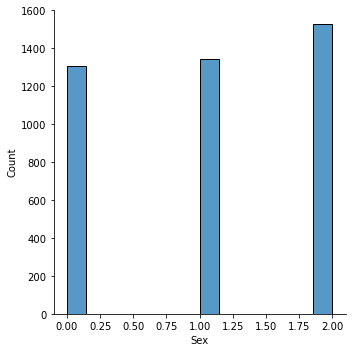

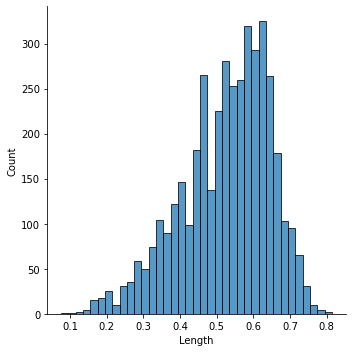

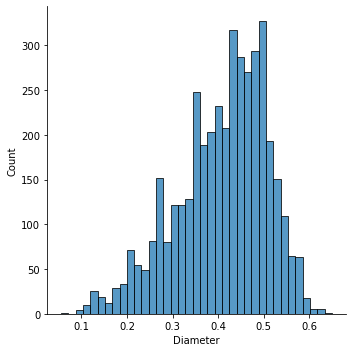

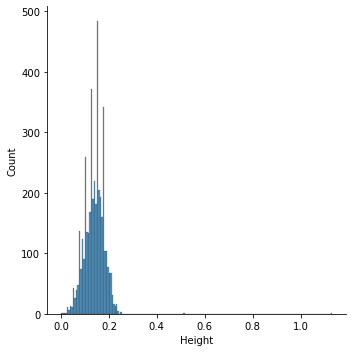

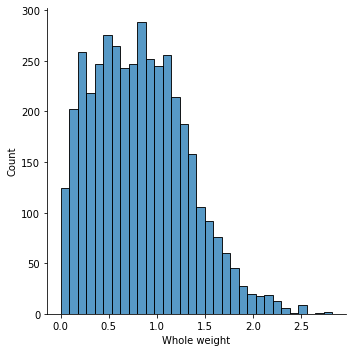

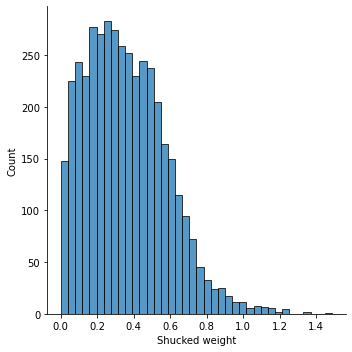

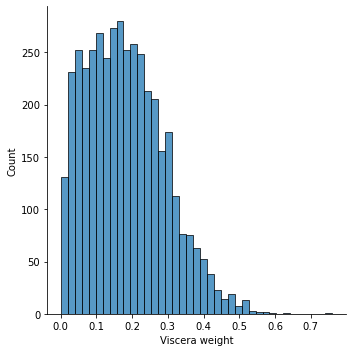

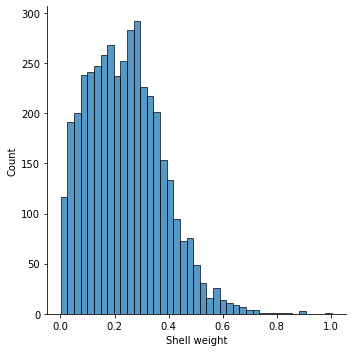

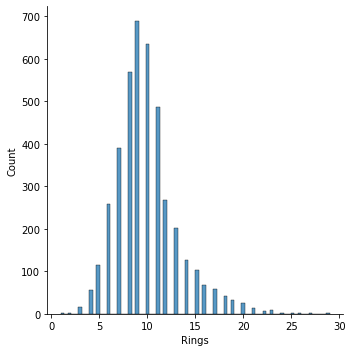

In [8]:
for i in df.columns:
    sns.displot(df[i])

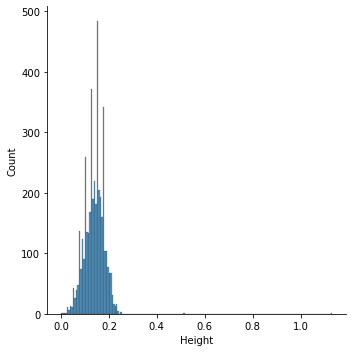

In [9]:
sns.displot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

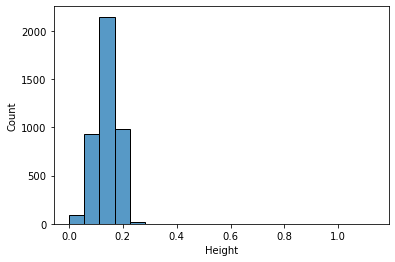

In [10]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

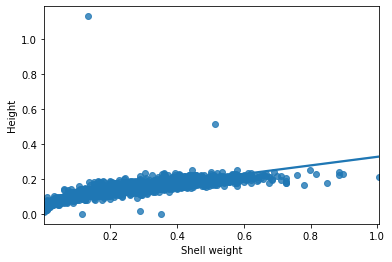

In [11]:
sns.regplot(x="Shell weight",y="Height",data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

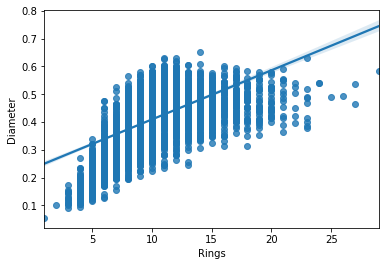

In [12]:
sns.regplot(x="Rings",y="Diameter",data=df)

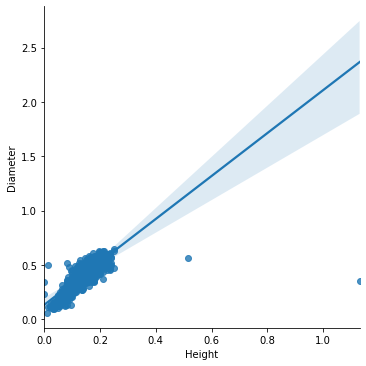

In [13]:
sns.lmplot(x='Height',y='Diameter',data=df)

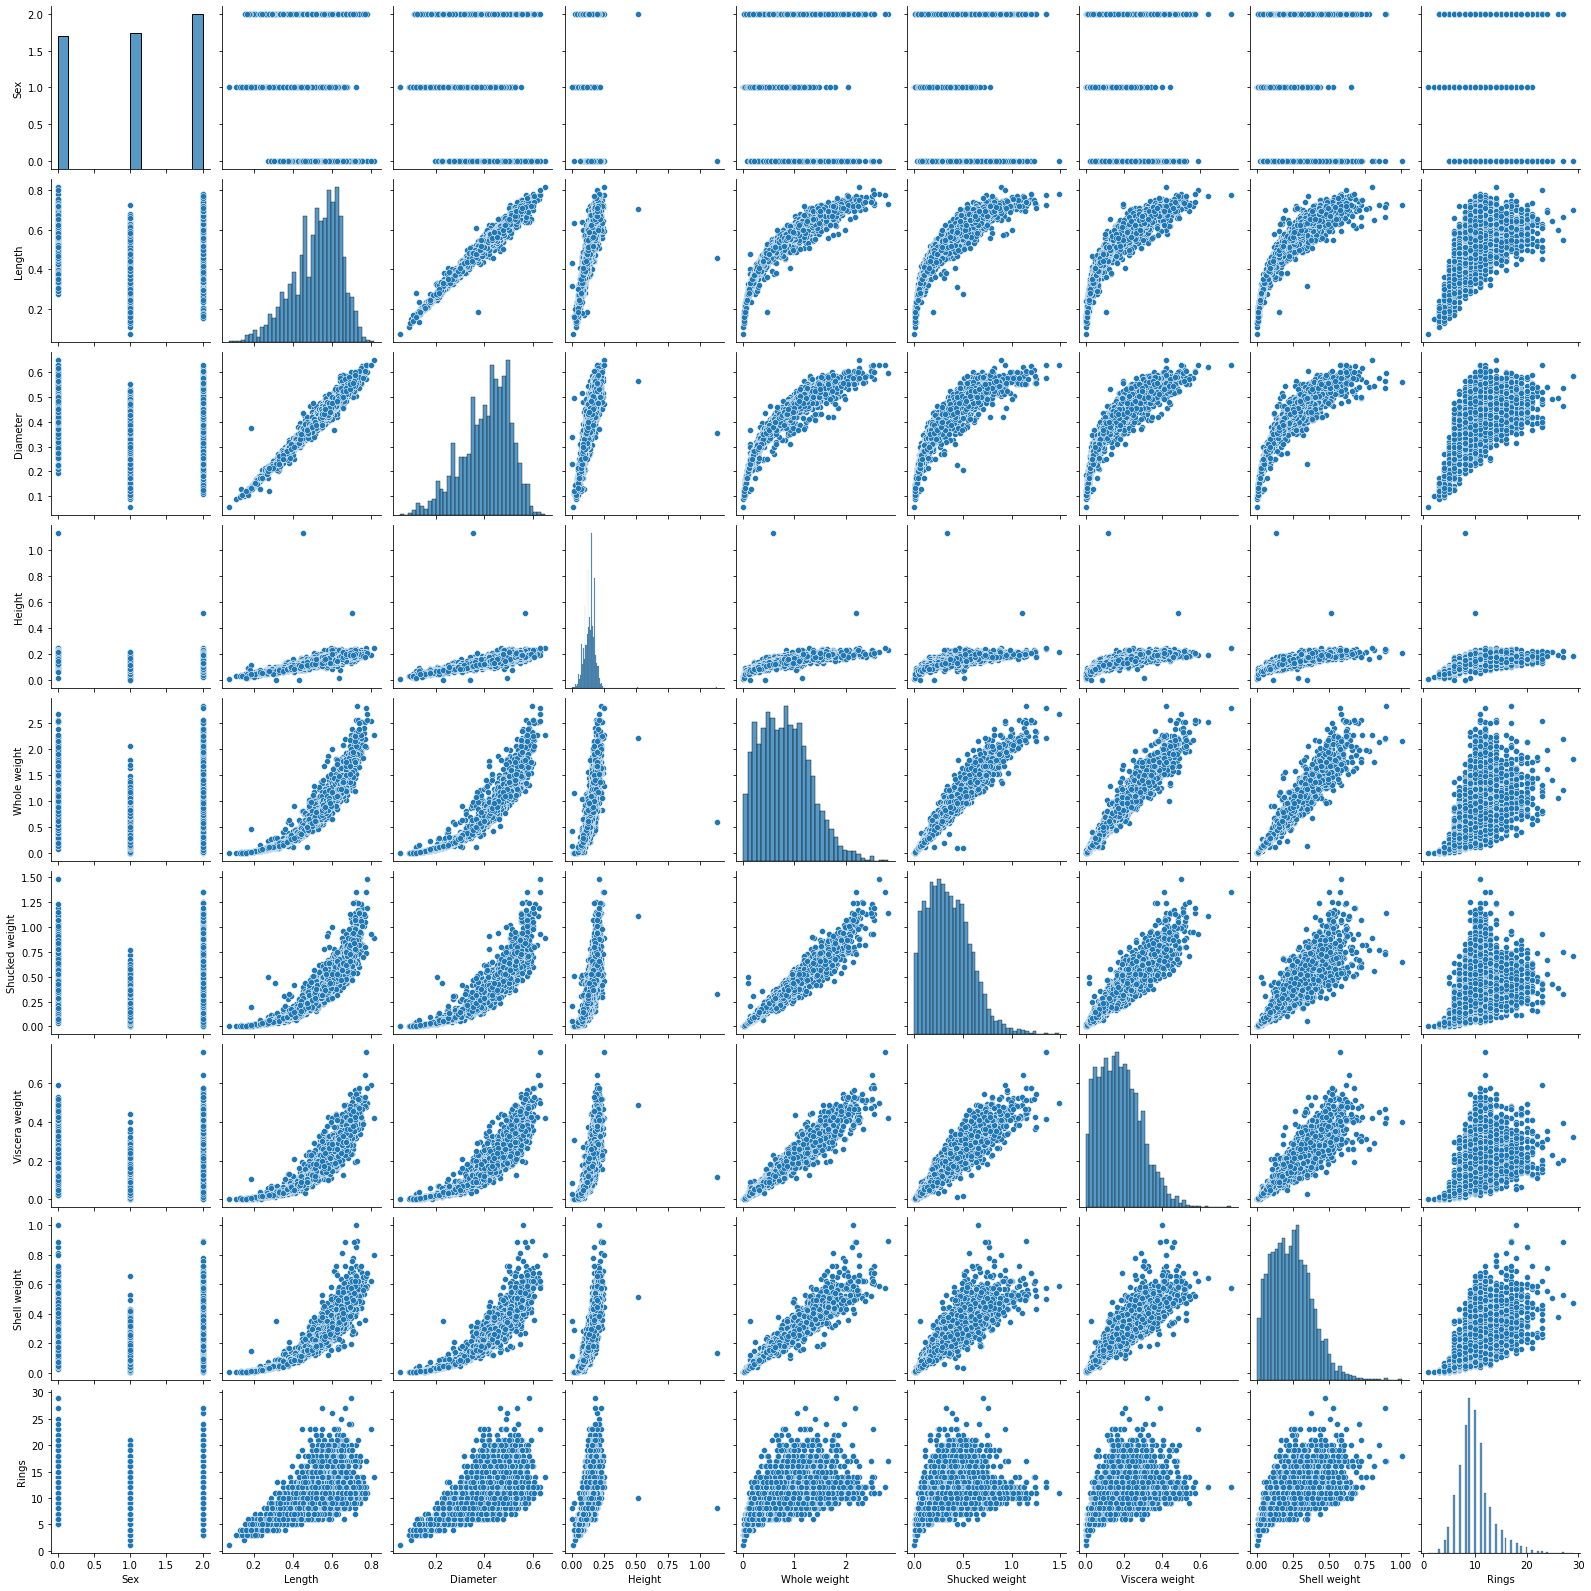

In [14]:
sns.pairplot(df)

In [7]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


outlier is present

# removing outlier

In [8]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [9]:
df.shape

(4177, 9)

In [14]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [15]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
df_new_z.shape

(4027, 9)

In [17]:
dataloss=((4177-4027)/4177)*100
dataloss

3.5910940866650707

total data loss is less than 10 so we can proceed

In [19]:
df=df_new_z

defining features and tergets

In [21]:
features=df.drop("Rings",axis=1)
target=df["Rings"]

In [35]:
x= features
y=target

In [68]:
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [69]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15969763, -0.56936804, -0.42027443, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [ 1.15969763, -1.47535808, -1.4631268 , ..., -1.20941043,
        -1.23110406, -1.25603283],
       [-1.28538214,  0.07776771,  0.15329438, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 1.15969763,  0.68176107,  0.72686319, ...,  0.85473721,
         1.08172072,  0.60445329],
       [-1.28538214,  0.89747298,  0.83114842, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.15969763,  1.63089349,  1.56114509, ...,  2.88981235,
         1.94298183,  2.06626381]])

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [71]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([ 0.07319791, -0.16132319,  1.17821321,  0.7823068 ,  3.15066566,
       -3.62155017, -0.68770891,  0.97892033])

In [72]:
list(zip(lr.coef_,features))

[(0.07319790815965084, 'Sex'),
 (-0.1613231930573895, 'Length'),
 (1.1782132071230216, 'Diameter'),
 (0.7823068049938168, 'Height'),
 (3.1506656620544917, 'Whole weight'),
 (-3.621550171433736, 'Shucked weight'),
 (-0.6877089115743302, 'Viscera weight'),
 (0.9789203254341396, 'Shell weight')]

In [73]:
lr.intercept_

9.76157981959779

In [74]:
lr.score(xtrain,ytrain)

0.5089974614011541

In [75]:
pred=lr.predict(xtest)
pred

array([11.03718394,  8.45775503,  8.90931711, ..., 10.65860585,
        6.85368596,  9.84717471])

In [76]:
print('Predicted values',pred)

Predicted values [11.03718394  8.45775503  8.90931711 ... 10.65860585  6.85368596
  9.84717471]


In [77]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,11.037184
1,8.457755
2,8.909317
3,8.281874
4,12.822036
...,...
1204,8.094902
1205,9.960067
1206,10.658606
1207,6.853686


In [78]:
lr.score(xtest,ytest)

0.5235173568080815

In [80]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.5235173568080815


getting r2 score 0.52

# Linear Regression model

In [96]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm.score(xtrain,ytrain)
pred=lm.predict(xtest)
print('Predicted result:',pred)
print('actual',ytest)

Predicted result: [11.03718394  8.45775503  8.90931711 ... 10.65860585  6.85368596
  9.84717471]
actual 3127     9
3153     9
1126     9
1247     8
255     15
        ..
1768     8
2921     9
3592    11
2131     6
2967    11
Name: Rings, Length: 1209, dtype: int64


In [97]:
print('actual result:',ytest)

actual result: 3127     9
3153     9
1126     9
1247     8
255     15
        ..
1768     8
2921     9
3592    11
2131     6
2967    11
Name: Rings, Length: 1209, dtype: int64


In [98]:
print('error:')
print(mean_squared_error(pred,ytest))

error:
3.893240105795293


In [99]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.5089970636226737

In [100]:
ls.coef_

array([ 0.07305754, -0.15489288,  1.17183127,  0.78213648,  3.13712463,
       -3.61552481, -0.68381727,  0.98300355])

In [101]:
rd=Ridge(alpha=0.0001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)

0.5089974614008104

In [102]:
rd.coef_

array([ 0.07319787, -0.16132195,  1.17821159,  0.78230696,  3.15064933,
       -3.6215422 , -0.68770529,  0.97892571])

In [103]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(xtrain,ytrain)
enrpred=enr.predict(xtest)
print(enr.score(xtrain,ytrain))
enr.coef_

0.5089962575561975


array([ 0.07307785, -0.15636693,  1.17276047,  0.78244503,  3.12108642,
       -3.60739587, -0.68070292,  0.98846944])

accuracy score of all model

In [104]:
from sklearn.svm import SVR

In [106]:
svr = SVR(kernel = 'linear')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)
svr = SVR(kernel = 'poly')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)
svr = SVR(kernel = 'rbf')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [107]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(xtrain,ytrain)
    print(sv.score(xtrain,ytrain))

0.48470865851088896
0.3649140598892133
0.5375016523651153


# ensamble technique

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [112]:
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [113]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(xtrain, ytrain)
rf.score(xtrain, ytrain)
pred_decision = rf.predict(xtest)

rfs = r2_score(ytest,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 54.94417118936556
Cross Val Score: 45.283777997576166


# loading model

In [114]:
import pickle
filename = 'bhatt.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [115]:
loaded_model = pickle.load(open('bhatt.pkl', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.5494417118936556


In [116]:
conclusion=pd.DataFrame([loaded_model.predict(xtest)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [117]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208
Predicted,10.85,7.58,9.18,7.88,15.74,10.06,10.27,10.31,7.64,8.92,...,10.22,14.74,6.72,14.31,12.14,8.99,10.73,11.36,8.4,10.24
Orginal,10.85,7.58,9.18,7.88,15.74,10.06,10.27,10.31,7.64,8.92,...,10.22,14.74,6.72,14.31,12.14,8.99,10.73,11.36,8.4,10.24
